
频域匹配滤波有三种方式：

   1. 方式1的匹配滤波器：时间反褶后取复共轭，计算Nfft点补零DFT
    H1(f) = fft(conj(s(-t)),Nfft)

   2. 方式2的匹配滤波器：补零后计算Nfft点DFT，对结果取复共轭
    H2(f) = conj(fft(s(t),Nfft))

   3. 方式3的匹配滤波器：直接在频域生成匹配滤波器
    H3(f) = exp(1i*pi*f.^2/K)列表内容

本例用于方式2产生的匹配滤波器频率响应函数的幅度和相位


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fftshift,ifft,ifftshift
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [32]:
TBP = 724;               # 时间带宽积
T = 42e-6;               # 信号持续时间

Nfft = 2**11
B = TBP/T;               # 信号带宽
K = B/T;                 # 调频率

ratio = 1.07             # 过采样率
F = ratio*B              # 采样频率
N = int( 2*np.ceil(F*T/2) ) #采样点数

dt = T/N
df = F/N


t = np.arange(-T/2,T/2,dt)
f = np.arange(-F/2,F/2,df)

st = np.exp(1j*np.pi*K*t**2)  #  % 生成信号
Sf = fft(st)
window = np.kaiser(N,2.5); #  % 窗
ht_window = window*st

Hf2 = np.conj(fft(ht_window,Nfft));


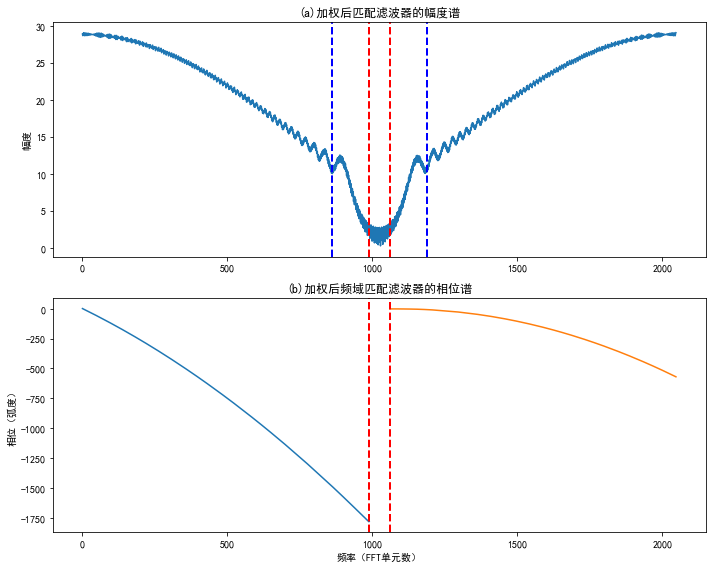

In [44]:

fig = plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(np.abs(Hf2));
plt.axvline(x=860, c="b", ls="--", lw=2)
plt.axvline(x=1190, c="b", ls="--", lw=2)

plt.axvline(x=990, c="r", ls="--", lw=2)
plt.axvline(x=1060, c="r", ls="--", lw=2)
plt.title('(a)加权后匹配滤波器的幅度谱');plt.ylabel('幅度');
plt.subplot(2,1,2);
plt.plot(np.arange(0,990),np.unwrap(-np.angle(Hf2[:990])))
plt.plot(np.arange(1060,2048),np.unwrap(-np.angle(Hf2[1060:2048])))
plt.axvline(x=990, c="r", ls="--", lw=2)
plt.axvline(x=1060, c="r", ls="--", lw=2)

# plt.plot(n,np.unwrap(np.angle(Hf2)))
# plt.plot(n,np.angle(Hf2))
# plt.plot(n,phase(Hf2))
plt.title('(b)加权后频域匹配滤波器的相位谱');plt.ylabel('相位（弧度）');plt.xlabel('频率（FFT单元数）');
fig.tight_layout()